Annual cycle of number of CB, and of area of CB

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.patheffects as mpe
from matplotlib.ticker import MultipleLocator
import os, sys
import warnings

import pandas as pd

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore", category=UserWarning)

from cloudbandpy.figure_tools import set_fontsize
from cloudbandpy.io_utilities import load_ymlfile, load_data_from_saved_var_files
from cloudbandpy.time_utilities import (
    add_startend_datetime2config,
    create_list_of_dates,
)

In [2]:
def set_figures_props():
    set_fontsize(size=22)
    mpl.rcParams["axes.spines.left"] = True
    mpl.rcParams["axes.spines.right"] = False
    mpl.rcParams["axes.spines.top"] = False
    mpl.rcParams["axes.spines.bottom"] = True
    return


def get_cmap(n, name="viridis"):
    """Returns a function that maps each index in 0, 1, ..., n-1 to a distinct
    RGB color; the keyword argument name must be a standard mpl colormap name."""
    return mpl.cm.get_cmap(name, n)

Configuration file

In [3]:
base_dir = "../../"

config_file = os.path.join(base_dir, "config/config_cbworkflow_southPacific.yml")
config = load_ymlfile(config_file, isconfigfile=True)

# Make sure the dates are covering the whole period
config_copy = config.copy()
config_copy["startdate"] = "19590101.00"
config_copy["enddate"] = "20211231.00"
config_copy["load_saved_files"] = True

add_startend_datetime2config(config_copy)
list_of_dates = create_list_of_dates(config_copy)

2023-12-13 16:57:30,532 - io_utilities.load_ymlfile - INFO: Configuration file loaded


Load cloud bands for the each basin

In [4]:
config_copy["domain"] = "southPacific"
list_of_cloud_bands_southPacific = load_data_from_saved_var_files(
    config_copy, varname="list_of_cloud_bands"
)

config_copy["domain"] = "northPacific"
list_of_cloud_bands_northPacific = load_data_from_saved_var_files(
    config_copy, varname="list_of_cloud_bands"
)

config_copy["domain"] = "southAtlantic"
list_of_cloud_bands_southAtlantic = load_data_from_saved_var_files(
    config_copy, varname="list_of_cloud_bands"
)

config_copy["domain"] = "southIndianOcean"
list_of_cloud_bands_southIndianOcean = load_data_from_saved_var_files(
    config_copy, varname="list_of_cloud_bands"
)

2023-12-13 16:57:30,540 - io_utilities.load_data_from_saved_var_files - INFO: Load data from: 19590101.00 to 20211231.00
2023-12-13 16:57:45,730 - io_utilities.load_data_from_saved_var_files - INFO: Load data from: 19590101.00 to 20211231.00
2023-12-13 16:57:54,284 - io_utilities.load_data_from_saved_var_files - INFO: Load data from: 19590101.00 to 20211231.00
2023-12-13 16:57:59,482 - io_utilities.load_data_from_saved_var_files - INFO: Load data from: 19590101.00 to 20211231.00


In [5]:
def list_of_cb_area_per_day(inlist: list):
    list_area_per_day = []
    for sublist in inlist:
        if not sublist:  # Check if sublist is empty
            list_area_per_day.append([0])
        else:
            areas = [cb.area if hasattr(cb, "area") else 0 for cb in sublist]
            list_area_per_day.append([areas])
    return list_area_per_day


def list_of_sum_cb_area_per_day(inlist: list):
    list_area_per_day = []
    for sublist in inlist:
        if not sublist:  # Check if sublist is empty
            list_area_per_day.append(0)
        else:
            areas = [cb.area if hasattr(cb, "area") else 0 for cb in sublist]
            list_area_per_day.append(sum(areas))
    return list_area_per_day

In [6]:
list_of_cb_area_per_day_southPacific = list_of_cb_area_per_day(
    list_of_cloud_bands_southPacific
)
list_of_cb_area_per_day_northPacific = list_of_cb_area_per_day(
    list_of_cloud_bands_northPacific
)
list_of_cb_area_per_day_southAtlantic = list_of_cb_area_per_day(
    list_of_cloud_bands_southAtlantic
)
list_of_cb_area_per_day_southIndianOcean = list_of_cb_area_per_day(
    list_of_cloud_bands_southIndianOcean
)

list_of_sum_cb_area_per_day_southPacific = list_of_sum_cb_area_per_day(
    list_of_cloud_bands_southPacific
)
list_of_sum_cb_area_per_day_northPacific = list_of_sum_cb_area_per_day(
    list_of_cloud_bands_northPacific
)
list_of_sum_cb_area_per_day_southAtlantic = list_of_sum_cb_area_per_day(
    list_of_cloud_bands_southAtlantic
)
list_of_sum_cb_area_per_day_southIndianOcean = list_of_sum_cb_area_per_day(
    list_of_cloud_bands_southIndianOcean
)

In [7]:
series_southPacific = pd.Series(
    list_of_sum_cb_area_per_day_southPacific,
    name="sum_cb_area_southPacific",
    index=list_of_dates,
)
series_northPacific = pd.Series(
    list_of_sum_cb_area_per_day_northPacific,
    name="sum_cb_area_northPacific",
    index=list_of_dates,
)
series_southAtlantic = pd.Series(
    list_of_sum_cb_area_per_day_southAtlantic,
    name="sum_cb_area_southAtlantic",
    index=list_of_dates,
)
series_southIndianOcean = pd.Series(
    list_of_sum_cb_area_per_day_southIndianOcean,
    name="sum_cb_area_southIndianOcean",
    index=list_of_dates,
)

In [8]:
domain_cloud_bands = {
    "South Pacific": list_of_cloud_bands_southPacific,
    "North Pacific": list_of_cloud_bands_northPacific,
    "South Atlantic": list_of_cloud_bands_southAtlantic,
    "South Indian Ocean": list_of_cloud_bands_southIndianOcean,
}

In [9]:
df_list = []

for domain, cloud_bands in domain_cloud_bands.items():
    # Number of cloud bands for each day
    nb_cb_each_date = [len(el) for el in cloud_bands]

    # Create a list for pandas dataframe
    list4pandas = [[date, nb_cb] for date, nb_cb in zip(list_of_dates, nb_cb_each_date)]

    # Create a dataframe for each domain
    df_domain = pd.DataFrame(list4pandas, columns=["time", domain])
    df_list.append(df_domain)

In [10]:
# Merge dataframes based on the 'time' column
df = df_list[0]
for df_domain in df_list[1:]:
    df = pd.merge(df, df_domain, on="time", how="outer")

# Set 'time' as the index
df.set_index("time", inplace=True)

# Add 'year' and 'month' columns
df["year"] = df.index.year
df["month"] = df.index.month
df["day"] = df.index.day

In [11]:
monthlysum = df.groupby("month")[
    ["South Pacific", "North Pacific", "South Atlantic", "South Indian Ocean"]
].sum()
monthlysum.index = pd.to_datetime(monthlysum.index, format="%m")
monthlysum.index = monthlysum.index.strftime("%m")

In [12]:
monthlysum

,South Pacific,North Pacific,South Atlantic,South Indian Ocean
month,,,,
01,2020,590,1121,930
02,1785,484,891,781
03,1768,587,811,640
04,1421,524,392,355
05,1222,903,270,134
06,801,933,157,25
07,556,938,127,33
08,459,1165,160,12
09,531,982,327,20


2023-12-13 16:58:04,564 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-13 16:58:04,566 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-13 16:58:04,568 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-13 16:58:04,568 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-13 16:58:04,570 

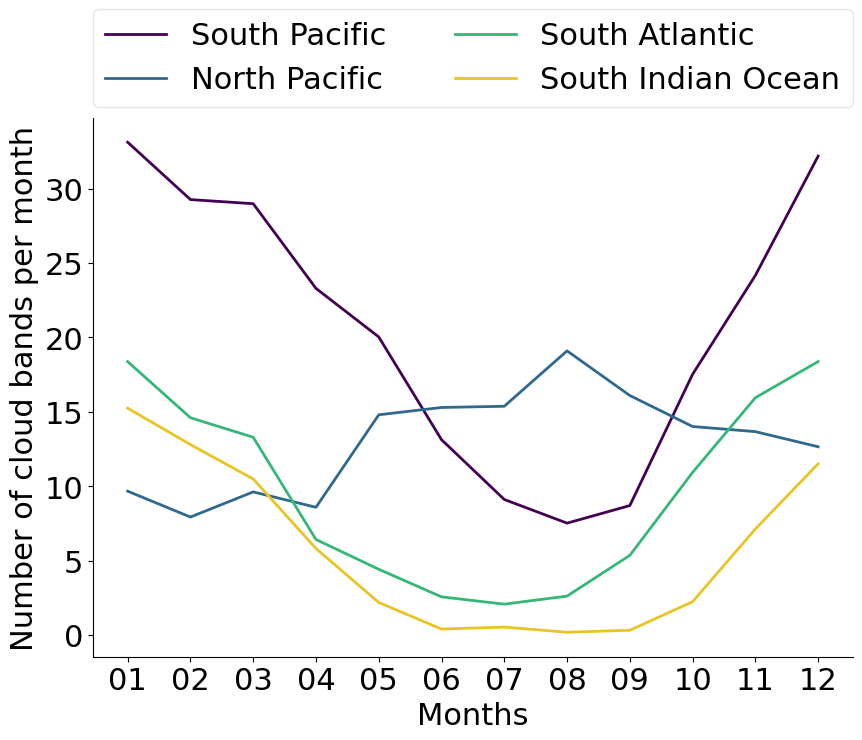

In [13]:
set_figures_props()

nyears = 61.0
cmap = get_cmap(len(monthlysum.keys()))
fig, ax = plt.subplots(1, 1, figsize=(9.8, 7))
for i, basin in enumerate(monthlysum.keys()):  # no index
    if basin == "South Indian Ocean":
        ax.plot(
            monthlysum.index, monthlysum[basin] / nyears, lw=2, c="#eac425", label=basin
        )
    else:
        ax.plot(
            monthlysum.index, monthlysum[basin] / nyears, lw=2, c=cmap(i), label=basin
        )
#
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.set_xlabel("Months")
ax.set_ylabel("Number of cloud bands per month")
plt.legend(
    bbox_to_anchor=(0, 1.02, 1, 0.2),
    loc="lower left",
    mode="expand",
    borderaxespad=0,
    ncol=2,
    framealpha=0.5,
)

In [16]:
newdf = pd.DataFrame(index=series_southPacific.index)

newdf['South Pacific'] = series_southPacific.values
newdf['North Pacific'] = series_northPacific.values
newdf['South Atlantic'] = series_southAtlantic.values
newdf['South Indian Ocean'] = series_southIndianOcean.values

# Add 'year' and 'month' columns
newdf["year"] = df.index.year
newdf["month"] = df.index.month
newdf["day"] = df.index.day

In [17]:
# Group by 'year'
monthlycb_area_mean = newdf.groupby("month")[["South Pacific", "North Pacific", "South Atlantic", "South Indian Ocean"]].mean()
monthlycb_area_mean.index = pd.to_datetime(monthlycb_area_mean.index, format="%m")
monthlycb_area_mean.index = monthlycb_area_mean.index.strftime("%m")

In [18]:
monthlycb_area_mean

,South Pacific,North Pacific,South Atlantic,South Indian Ocean
month,,,,
01,6.812944e+06,1.166445e+06,2.011089e+06,1.626807e+06
02,6.871466e+06,9.299368e+05,1.644109e+06,1.419171e+06
03,5.400146e+06,1.020333e+06,1.328350e+06,8.879459e+05
04,3.772952e+06,8.900110e+05,6.482262e+05,4.172995e+05
05,2.740865e+06,1.990595e+06,4.827167e+05,1.483996e+05
06,1.840679e+06,2.196445e+06,3.546755e+05,2.661757e+04
07,1.098690e+06,1.759021e+06,2.656068e+05,3.203854e+04
08,8.703990e+05,2.324672e+06,3.131137e+05,1.129428e+04
09,9.586092e+05,1.765666e+06,6.496326e+05,2.097783e+04


2023-12-13 17:01:55,865 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-13 17:01:55,866 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-13 17:01:55,867 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-13 17:01:55,868 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-13 17:01:55,869 

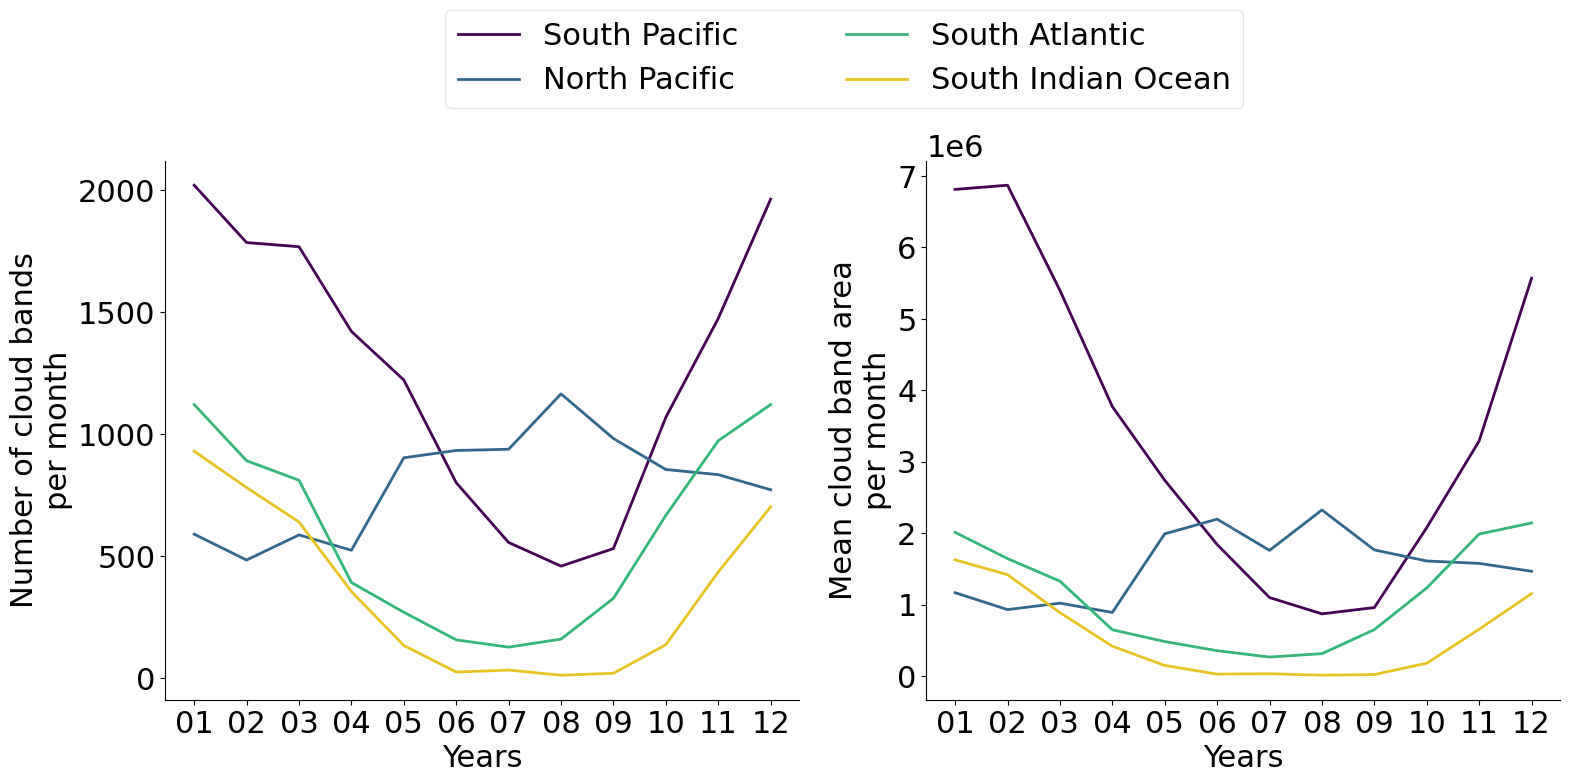

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

cmap = get_cmap(len(monthlysum.keys()))

for iax, ax in enumerate(axes.ravel()):
    if iax==0:
        for i, basin in enumerate(monthlysum.keys()):
            if basin=="South Indian Ocean":
                ax.plot(monthlysum.index, monthlysum[basin], lw=2, c="#eac425", label=basin)
            else:
                ax.plot(monthlysum.index, monthlysum[basin], lw=2, c=cmap(i), label=basin)
        ax.set_ylabel("Number of cloud bands\nper month")
        ax.set_xticklabels(monthlysum.index)
        ax.set_xlabel("Years")
    else:
        for i, name in enumerate(monthlycb_area_mean.keys()):  # no index
            if name=="South Indian Ocean":
                ax.plot(monthlycb_area_mean.index, monthlycb_area_mean[name], lw=2, c="#eac425", label=name)
            else:
                ax.plot(monthlycb_area_mean.index, monthlycb_area_mean[name], lw=2, c=cmap(i), label=name)
        ax.set_ylabel("Mean cloud band area\nper month")
        ax.set_xticklabels(monthlycb_area_mean.index)
        ax.set_xlabel("Years")

plt.legend(bbox_to_anchor=(0, 1.08, 0.5, 0.2), borderaxespad=0, ncol=2, columnspacing=3.5, framealpha=0.5)

# fig.savefig("./annualcycle_sidebyside.png", dpi=200, bbox_inches="tight")

2023-12-13 17:01:59,860 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-13 17:01:59,862 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-13 17:01:59,863 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-13 17:01:59,864 - matplotlib.category - INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-12-13 17:01:59,864 

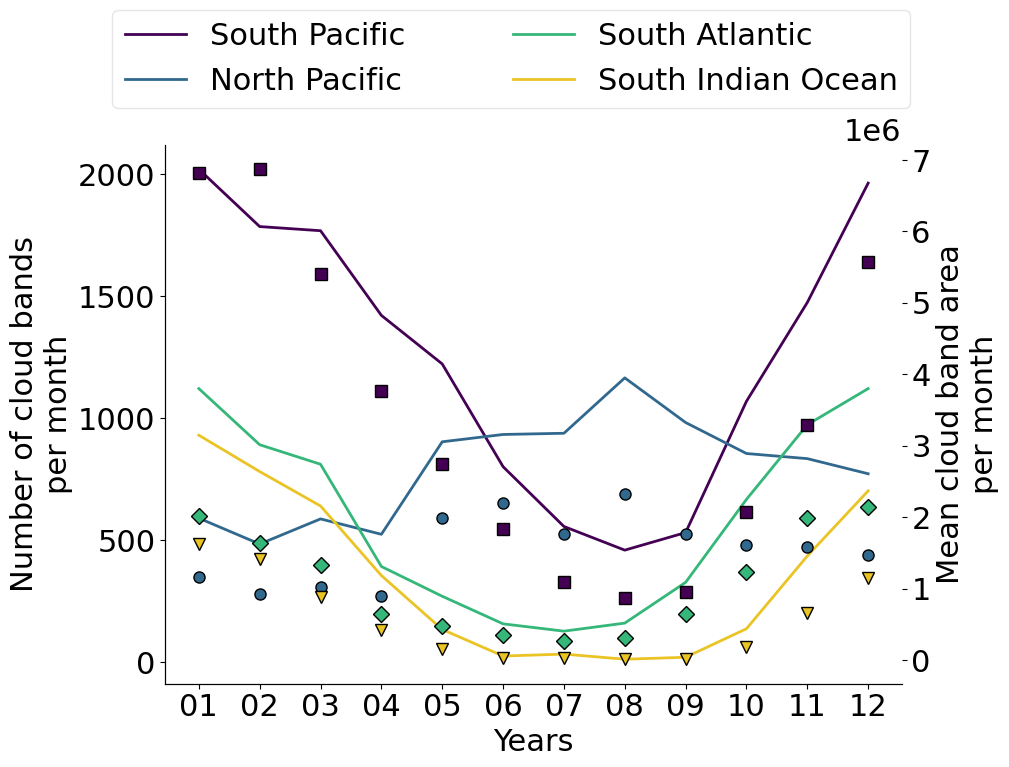

In [20]:
fig, ax1 = plt.subplots(figsize=(9.5, 7))

cmap = get_cmap(len(monthlysum.keys()))
mark = ['s', 'o', 'D', 'v']
for i, basin in enumerate(monthlysum.keys()):
    if basin == "South Indian Ocean":
        ax1.plot(monthlysum.index, monthlysum[basin], lw=2, c="#eac425", label=basin)
    else:
        ax1.plot(monthlysum.index, monthlysum[basin], lw=2, c=cmap(i), label=basin)

ax1.set_ylabel("Number of cloud bands\nper month")
ax1.set_xticklabels(monthlysum.index)
ax1.set_xlabel("Years")

# Create a second y-axis
ax2 = ax1.twinx()

for i, name in enumerate(monthlycb_area_mean.keys()):
    if name == "South Indian Ocean":
        ax2.plot(
            monthlycb_area_mean.index,
            monthlycb_area_mean[name],
            c="#eac425",
            linestyle="None",
            marker=mark[i],
            markerfacecolor="#eac425",
            markeredgecolor="k",
            markersize=8,
        )
    else:
        ax2.plot(
            monthlycb_area_mean.index,
            monthlycb_area_mean[name],
            c=cmap(i),
            linestyle="None",
            marker=mark[i],
            markerfacecolor=cmap(i),
            markeredgecolor='k',
            markersize=8,
        )

ax2.set_ylabel("Mean cloud band area\nper month")

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')

ax1.legend(
    loc="upper center",
    bbox_to_anchor=(0.47, 1.25),
    borderaxespad=0,
    ncol=2,
    columnspacing=3.5,
    framealpha=0.5,
)
# fig.savefig("./annualcycle_sameplot.png", dpi=200, bbox_inches="tight")